# 전처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# import time
# def my_time(func):
#     def wrapper():
#         str_time = time.time()
#         func()
#         end_time = time.time()
#         print(end_time-str_time, '초 소요')
#     return wrapper

In [3]:
X_train = pd.read_csv('../data/aug_train.csv')
X_test = pd.read_csv('../data/aug_test.csv')

In [4]:
X_test['target'] = -1
X = pd.concat([X_train, X_test])
# X.drop(columns=['enrollee_id','target'],inplace=True)

## 1. 숫자형으로 변경
#### 'education_level',  'last_new_job',  'experience', 'enrolled_university', 'company_size'
- 순위형 변수의 특징을 갖고 있어 숫자형 타입으로 변경

#### education_level

In [5]:
education_level = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
for i, v in enumerate(education_level):
    X.loc[X['education_level']==v, 'education_level'] = i

In [6]:
X['education_level'].value_counts(dropna=False)

2.0    12867
3.0     4857
1.0     2239
NaN      512
4.0      468
0.0      344
Name: education_level, dtype: int64

#### last_new_job

In [7]:
X.loc[X['last_new_job'] == '>4', 'last_new_job'] = 5
X.loc[X['last_new_job'] == 'never', 'last_new_job'] = 0

X['last_new_job'] = pd.to_numeric(X['last_new_job'], downcast='integer')

In [8]:
X['last_new_job'].value_counts(dropna=False)

1.0    8924
5.0    3643
2.0    3242
0.0    2710
3.0    1157
4.0    1148
NaN     463
Name: last_new_job, dtype: int64

#### experience

In [9]:
X.loc[X['experience'] == '>20', 'experience'] = 21
X.loc[X['experience'] == '<1', 'experience'] = 0

X['experience'] = pd.to_numeric(X['experience'], downcast='integer')

In [10]:
X['experience'].value_counts(dropna=False)

21.0    3669
5.0     1593
4.0     1548
3.0     1508
6.0     1346
2.0     1255
7.0     1144
9.0     1093
10.0    1081
8.0      884
11.0     750
15.0     745
14.0     641
1.0      605
0.0      596
16.0     576
12.0     546
13.0     453
17.0     378
19.0     333
18.0     306
20.0     167
NaN       70
Name: experience, dtype: int64

#### enrolled_university

In [11]:
enrolls = ['no_enrollment','Part time course','Full time course']
for i,v in enumerate(enrolls):
    X.loc[X['enrolled_university'] == v, 'enrolled_university'] = i

In [12]:
X['enrolled_university'].value_counts(dropna=False)

0.0    15336
2.0     4192
1.0     1342
NaN      417
Name: enrolled_university, dtype: int64

#### company_size, type

In [13]:
X.loc[X['company_size']=='<10', 'company_size'] = '~10'
X.loc[X['company_size']=='10/49', 'company_size'] = '10~49'

company_siz = ['~10', '10~49', '50-99', '100-500', '500-999','1000-4999','5000-9999','10000+']
for i, v in enumerate(company_siz):
    X.loc[X['company_size']==v, 'company_size'] = i

In [15]:
X['company_size'].value_counts(dropna=False)

NaN    6560
2.0    3421
3.0    2889
7.0    2236
1.0    1643
0.0    1471
5.0    1471
4.0     965
6.0     631
Name: company_size, dtype: int64

## 결측치 처리
#### gender: 최빈값으로 처리
#### major: 재구성 후 최빈값으로 처리

#### gender

In [406]:
X['gender'].fillna('Male', inplace=True)

#### major:  최빈값과 나머지의 합과의 비율 차이가 크므로 최빈값 major로 처리

In [407]:
nomajor_lst = list(X['major_discipline'].value_counts().index)
nomajor_lst.remove('STEM')
print(nomajor_lst)

['Humanities', 'Other', 'Business Degree', 'Arts', 'No Major']


In [408]:
X.loc[(X['major_discipline'] == 'STEM')|(X['major_discipline'].isna()) , 'major_discipline'] = 'major'
X.loc[X['major_discipline'] != 'major', 'major_discipline'] = 'no_major'

In [409]:
# 인코딩 전 현재 위아래로 concat되있어 중복되있으므로 인덱스 순번대로 재지정
X.reset_index(drop=True, inplace=True)

### 라벨 인코딩(Label Encoding)
#### 'city', 'gender', 'relevent_experience', 'enrolled_university',
#### 'major_discipline', 'company_size', 'company_type'

In [411]:
to_lb = list(X.columns[X[X.columns].dtypes == 'object'])

def lbe(x):
    if x.name in to_lb:
        return LabelEncoder().fit_transform(x)
    else:
        return x
    
X_new = X.apply(lbe)
X_new

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,1,0,0,2,0,21.0,8,6,1.0,36,1.0
1,29725,77,0.776,1,1,0,2,0,15.0,2,5,5.0,47,0.0
2,11561,64,0.624,1,1,2,2,0,5.0,8,6,0.0,83,0.0
3,33241,14,0.789,1,1,3,2,1,0.0,8,5,0.0,52,1.0
4,666,50,0.767,1,0,0,3,0,21.0,2,1,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,5,0.920,1,1,0,2,1,16.0,8,4,4.0,15,-1.0
21283,195,30,0.897,1,0,0,3,0,18.0,8,6,2.0,30,-1.0
21284,31762,2,0.887,1,1,0,0,0,3.0,8,5,0.0,18,-1.0
21285,7873,4,0.804,1,0,2,1,0,7.0,3,4,1.0,84,-1.0


## 최종 결측치 처리: KNN

In [412]:
missnan_columns = ['enrolled_university', 'education_level',
                   'experience', 'company_size', 'company_type', 'last_new_job']

# 마지막 라벨인 결측값을 np.nan으로 변경
for col in missnan_columns:
    X_new.loc[X_new[col]==len(X_new[col].unique())-1, col] = np.nan

In [372]:
from sklearn.impute import KNNImputer

under_list = []
for col in X_new.columns:
    if X_new[col].isna().sum():
        under_list.append(col)
        
imputer = KNNImputer(n_neighbors = 1)
X_new[under_list] = imputer.fit_transform(X_new[under_list])

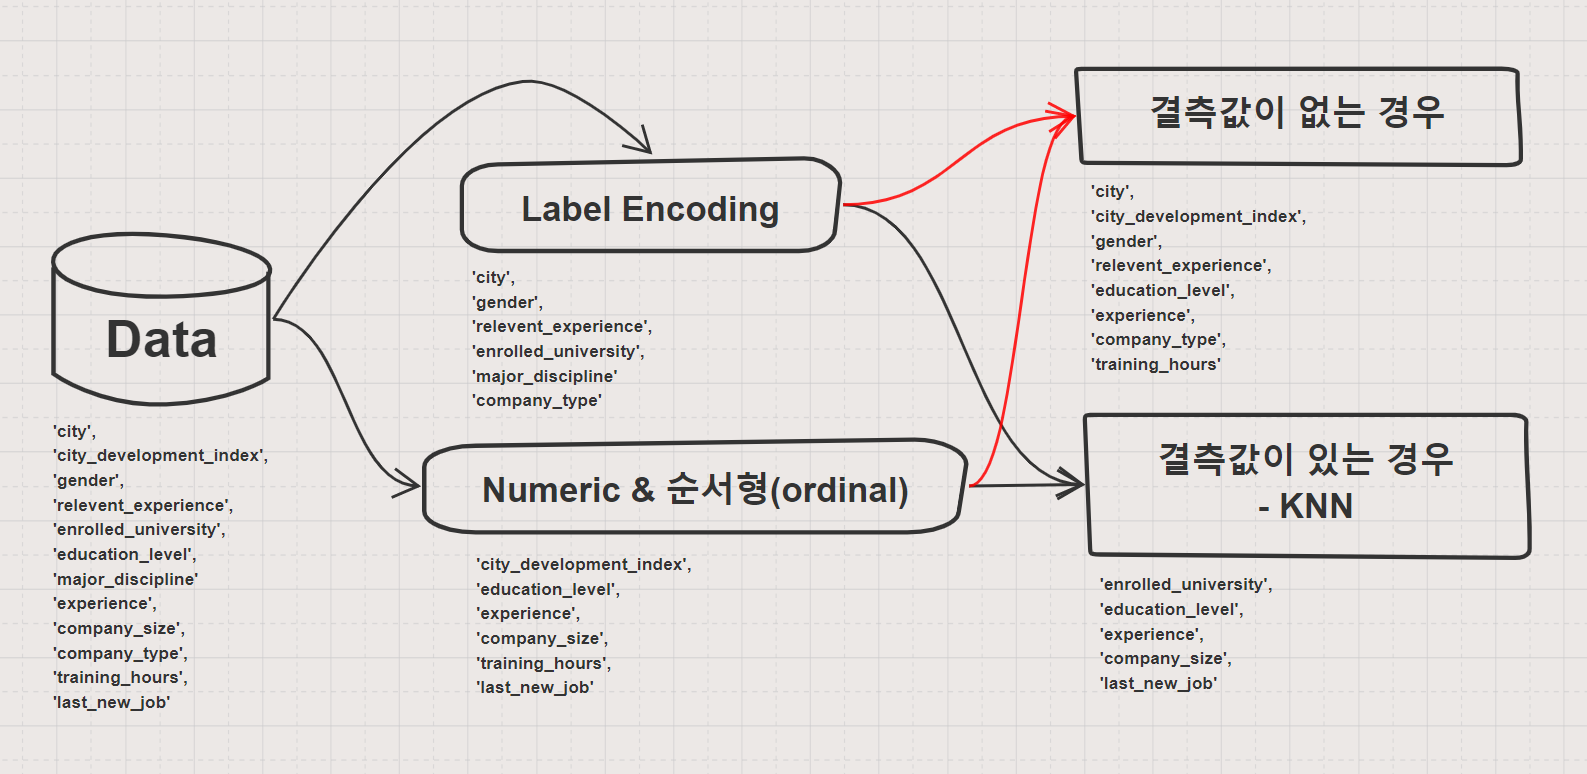

### StandardScaled

In [373]:
from sklearn.preprocessing import StandardScaler

y_tmp = X_new['target']
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_new.columns)
X_scaled_df.drop(columns='target',inplace=True)
X_scaled_df = pd.concat([X_scaled_df, y_tmp], axis=1)

In [414]:
# enrollee_id 제거, 다시 train,test 분리 후 target 분리
X_train = X_scaled_df.loc[X_scaled_df.loc[X_scaled_df.index, 'target'] != -1]
X_test = X_scaled_df.loc[X_scaled_df.loc[X_scaled_df.index, 'target'] == -1]
X_test.drop(columns='target',inplace=True)

c:\users\inje.jeong\anaconda3\envs\ml\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### 테이블 저장

In [415]:
X_train.to_csv('../data/prepcd_lbe_train.csv', index=False)
X_test.to_csv('../data/prepcd_lbe_test.csv', index=False)